# Analysis

## 1 merge

In [1]:
import pandas as pd
import os

read_path = './comments'
files = os.listdir(read_path)

In [2]:
df = pd.DataFrame()
for file in files:
    df_ = pd.read_excel(read_path+'/'+file)
    df = pd.concat([df, df_])
df.reset_index(inplace=True, drop=True)

In [3]:
df.head()

,id,name,price,comments,link,shop,brake type,material,brand,good comments
0,1282607,博世（BOSCH）刹车前片刹车皮现代瑞纳ix35吉利帝豪GX7起亚K2瑞纳远景博瑞风神,298.0,20000,https://item.jd.com/1282607.html#comment,博世汽车配件京东自营旗舰店,front,ceramic,博世（BOSCH）,16000.0
1,6077225,博世\n刹车片\n前片适用传祺 GS5 1.8T2.0 0986T11181,318.0,200,https://item.jd.com/6077225.html#comment,博世汽车配件京东自营旗舰店,front,ceramic,博世（BOSCH）,100.0
2,1089017,博世（BOSCH）刹车前片别克GL8君越君威陆尊迈锐宝C4世嘉科迈罗荣威950 1367,318.0,20000,https://item.jd.com/1089017.html#comment,博世汽车配件京东自营旗舰店,front,ceramic,博世（BOSCH）,8900.0
3,6045415,博世\n刹车片\n前片适用纳智捷5 Sedan纳5优6 SUV 0986AB9416,378.0,100,https://item.jd.com/6045415.html#comment,博世汽车配件京东自营旗舰店,front,ceramic,博世（BOSCH）,30.0
4,10085909096850,博世原装升级含陶瓷配方\n汽车刹车片\n制动片 前\n刹车片\n0986AB1362适用于 ...,239.0,2,https://item.jd.com/10085909096850.html#comment,博世车动专卖店,front,ceramic,博世（BOSCH）,2.0


In [4]:
df.shape

(8932, 10)

In [5]:
len(df['brand'].unique())

17

## 2 aggreagate

### 2.1 comments

In [3]:
comments_sum = df[['comments', 'brake type']].groupby(by=['brake type']).sum()
comments_sum

,comments
brake type,
front,19186214
rear,7177596


In [4]:
df.replace('semimetalic', 'semi-metallic', inplace=True)

In [5]:
agg = df[['comments', 'brake type', 'material']].groupby(by=['brake type', 'material']).sum()
agg['prop'] = None
agg.loc['front', 'prop'] = list(agg.loc['front','comments'] / comments_sum.loc['front']['comments'])
agg.loc['rear', 'prop'] = list(agg.loc['rear','comments'] / comments_sum.loc['rear']['comments'])
agg

comments      prop
brake type material                         
front      NAO             1877844  0.097875
           ceramic        13420508  0.699487
           low metallic    3405494  0.177497
           semi-metallic    482368  0.025141
rear       NAO             1519796  0.211742
           ceramic         4356192  0.606915
           low metallic    1259884   0.17553
           semi-metallic     41724  0.005813

In [6]:
f_n = agg.loc['front', 'NAO']['comments']
f_c = agg.loc['front', 'ceramic']['comments']
r_n = agg.loc['rear', 'NAO']['comments']
r_c = agg.loc['rear', 'ceramic']['comments']
f_c / (f_n + f_c), r_c / (r_n + r_c)

(0.8772518765419962, 0.7413548155646336)

In [7]:
import matplotlib.pyplot as plt
# font
plt.rcParams['font.sans-serif'] = ['Arial']
LABEL_FONT = {
    "fontsize": 12,
    "weight": "bold",
}    
plt.rcParams['figure.dpi'] = 500

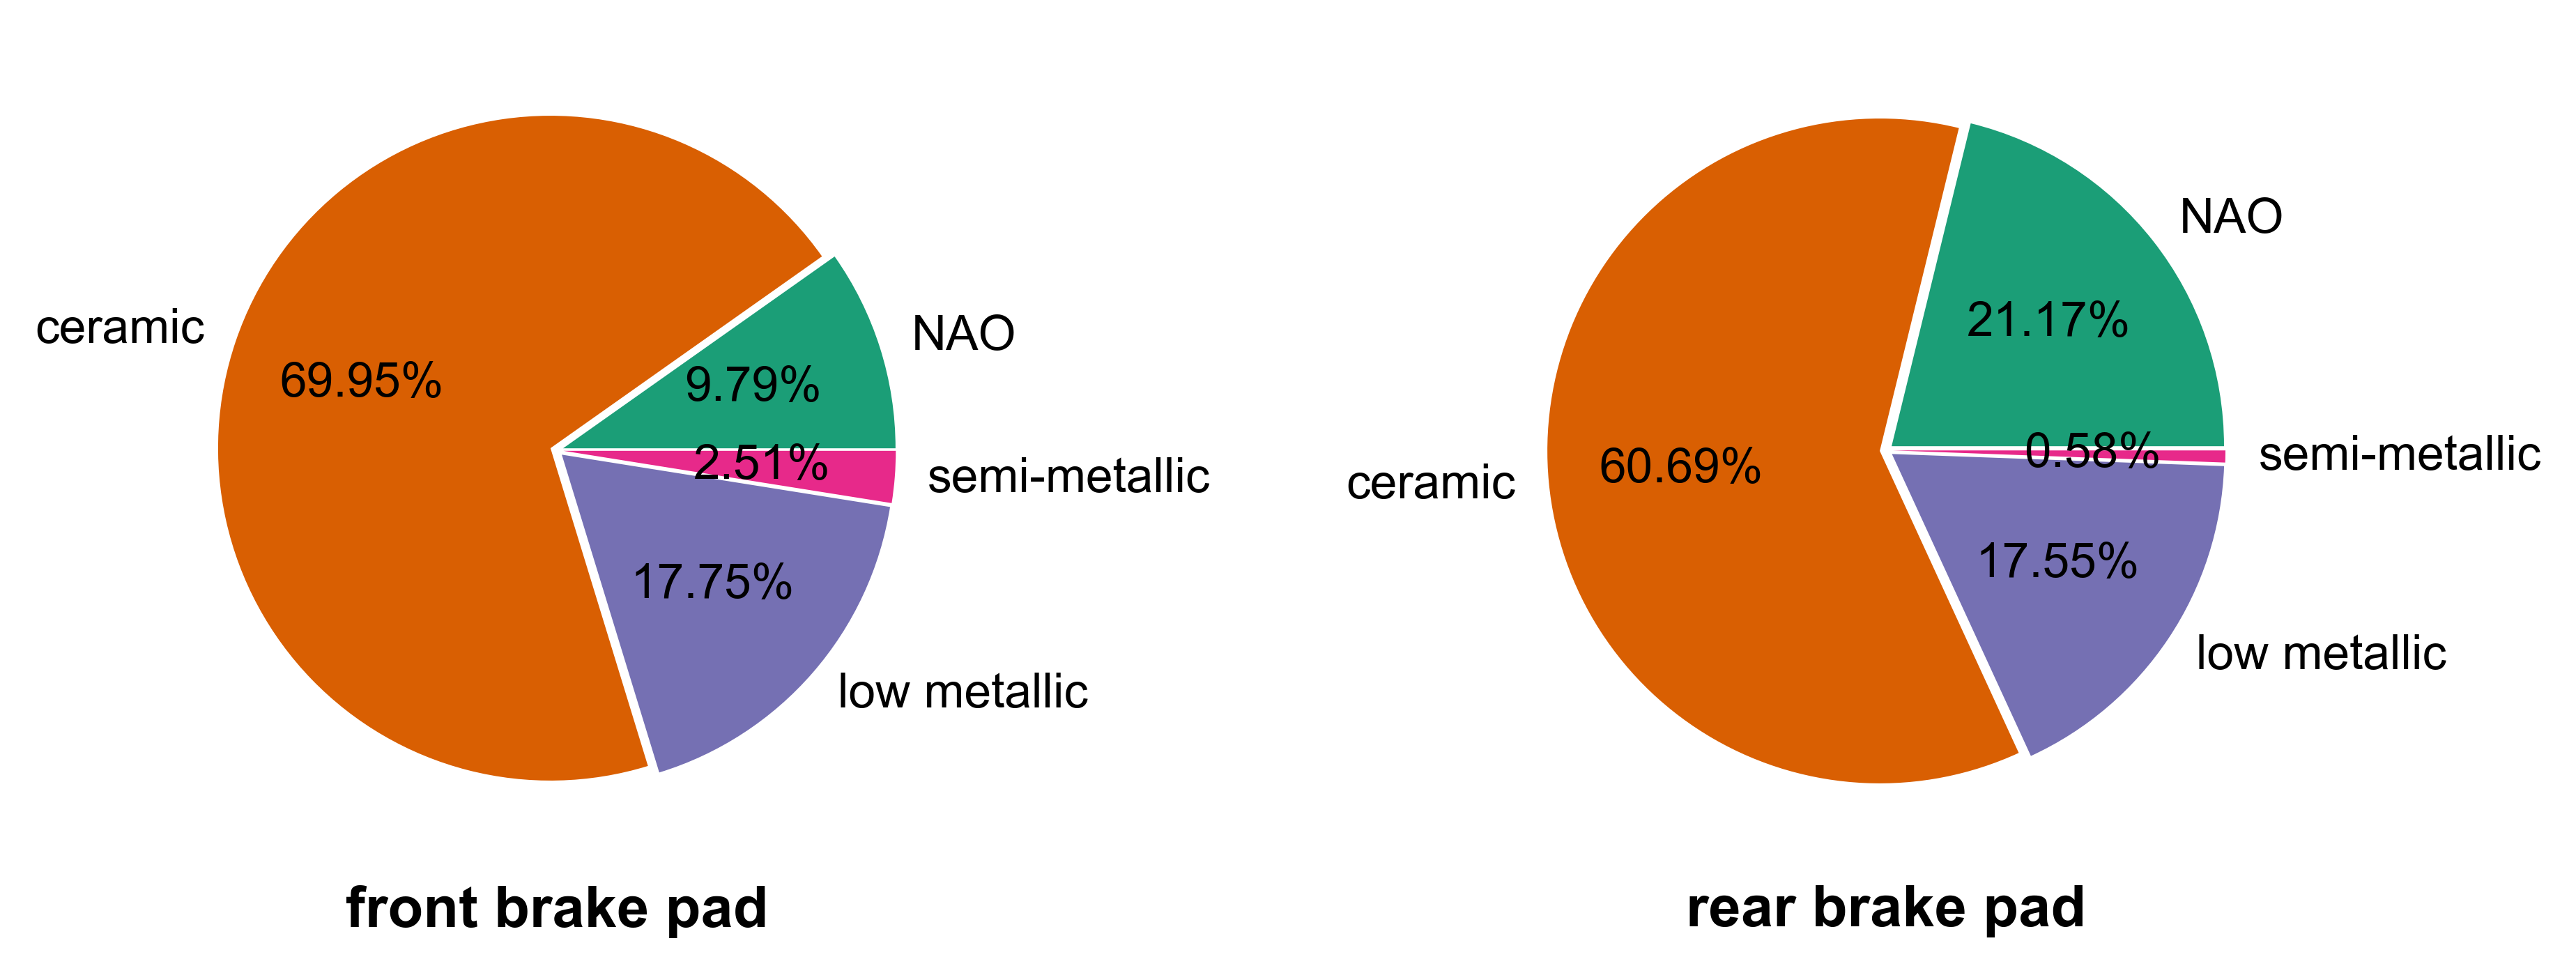

In [10]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
fig.subplots_adjust(wspace=0.6)

front = agg.loc['front', 'prop']
rear = agg.loc['rear', 'prop']

ax[0].pie(
    front.values,
    explode = [0.02, 0.02, 0.02, 0.02],
    labels = front.index,
    autopct='%.2f%%',
    colors = plt.get_cmap('Dark2')(range(front.shape[0]))
)
ax[0].set_xlabel('front brake pad', fontdict=LABEL_FONT)

ax[1].pie(
    rear.values,
    explode = [0.02, 0.02, 0.02, 0.02],
    # explode = [0.01, 0.03, 0.01, 0.01],
    labels = front.index,
    autopct='%.2f%%',
    colors = plt.get_cmap('Dark2')(range(rear.shape[0]))
)
ax[1].set_xlabel('rear brake pad', fontdict=LABEL_FONT)

plt.show()

In [8]:
df_ = df.replace('ceramic', 'NAO')
agg_ = df_[['comments', 'brake type', 'material']].groupby(by=['brake type', 'material']).sum()
agg_['prop'] = None
agg_.loc['front', 'prop'] = list(agg_.loc['front','comments'] / comments_sum.loc['front']['comments'])
agg_.loc['rear', 'prop'] = list(agg_.loc['rear','comments'] / comments_sum.loc['rear']['comments'])
agg_

comments      prop
brake type material                         
front      NAO            15298352  0.797362
           low metallic    3405494  0.177497
           semi-metallic    482368  0.025141
rear       NAO             5875988  0.818657
           low metallic    1259884   0.17553
           semi-metallic     41724  0.005813

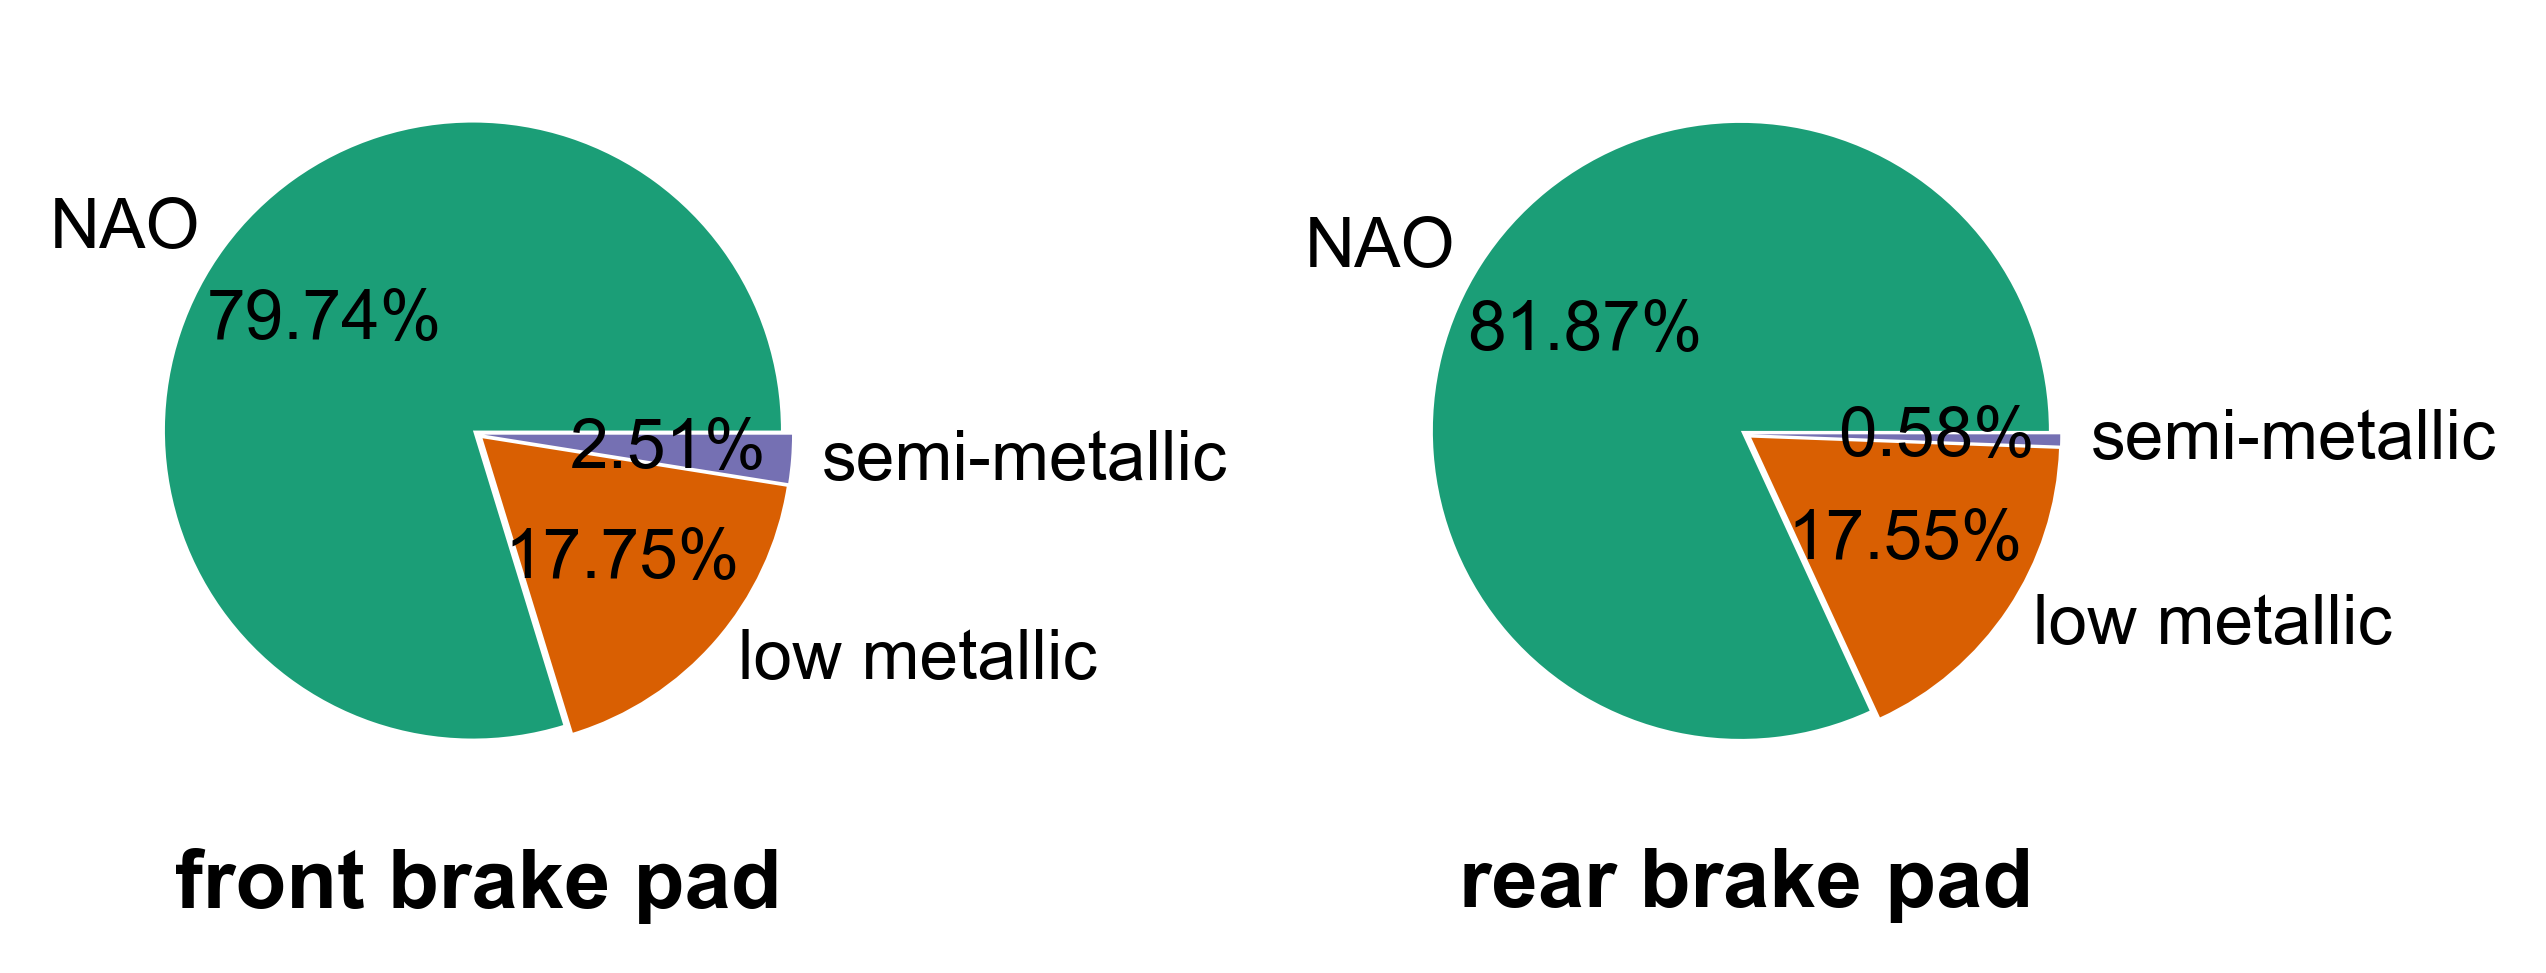

In [15]:
fig, ax = plt.subplots(1,2, figsize=(6,2))
# fig.subplots_adjust(wspace=0.6)

front = agg_.loc['front', 'prop']
rear = agg_.loc['rear', 'prop']

ax[0].pie(
    front.values,
    explode = [0.02, 0.02, 0.02],
    labels = front.index,
    autopct='%.2f%%',
    colors = plt.get_cmap('Dark2')(range(front.shape[0]))
)
ax[0].set_xlabel('front brake pad', fontdict=LABEL_FONT)

ax[1].pie(
    rear.values,
    explode = [0.02, 0.02, 0.02],
    # explode = [0.01, 0.03, 0.01, 0.01],
    labels = front.index,
    autopct='%.2f%%',
    colors = plt.get_cmap('Dark2')(range(rear.shape[0]))
)
ax[1].set_xlabel('rear brake pad', fontdict=LABEL_FONT)

plt.show()

### 2.2 price

In [11]:
price = df_[['price', 'brake type', 'material']].groupby(by=['brake type', 'material']).mean()
price

price
brake type material                 
front      NAO            420.294197
           low metallic   613.286569
           semi-metallic  328.615000
rear       NAO            329.404913
           low metallic   407.175691
           semi-metallic  263.100000

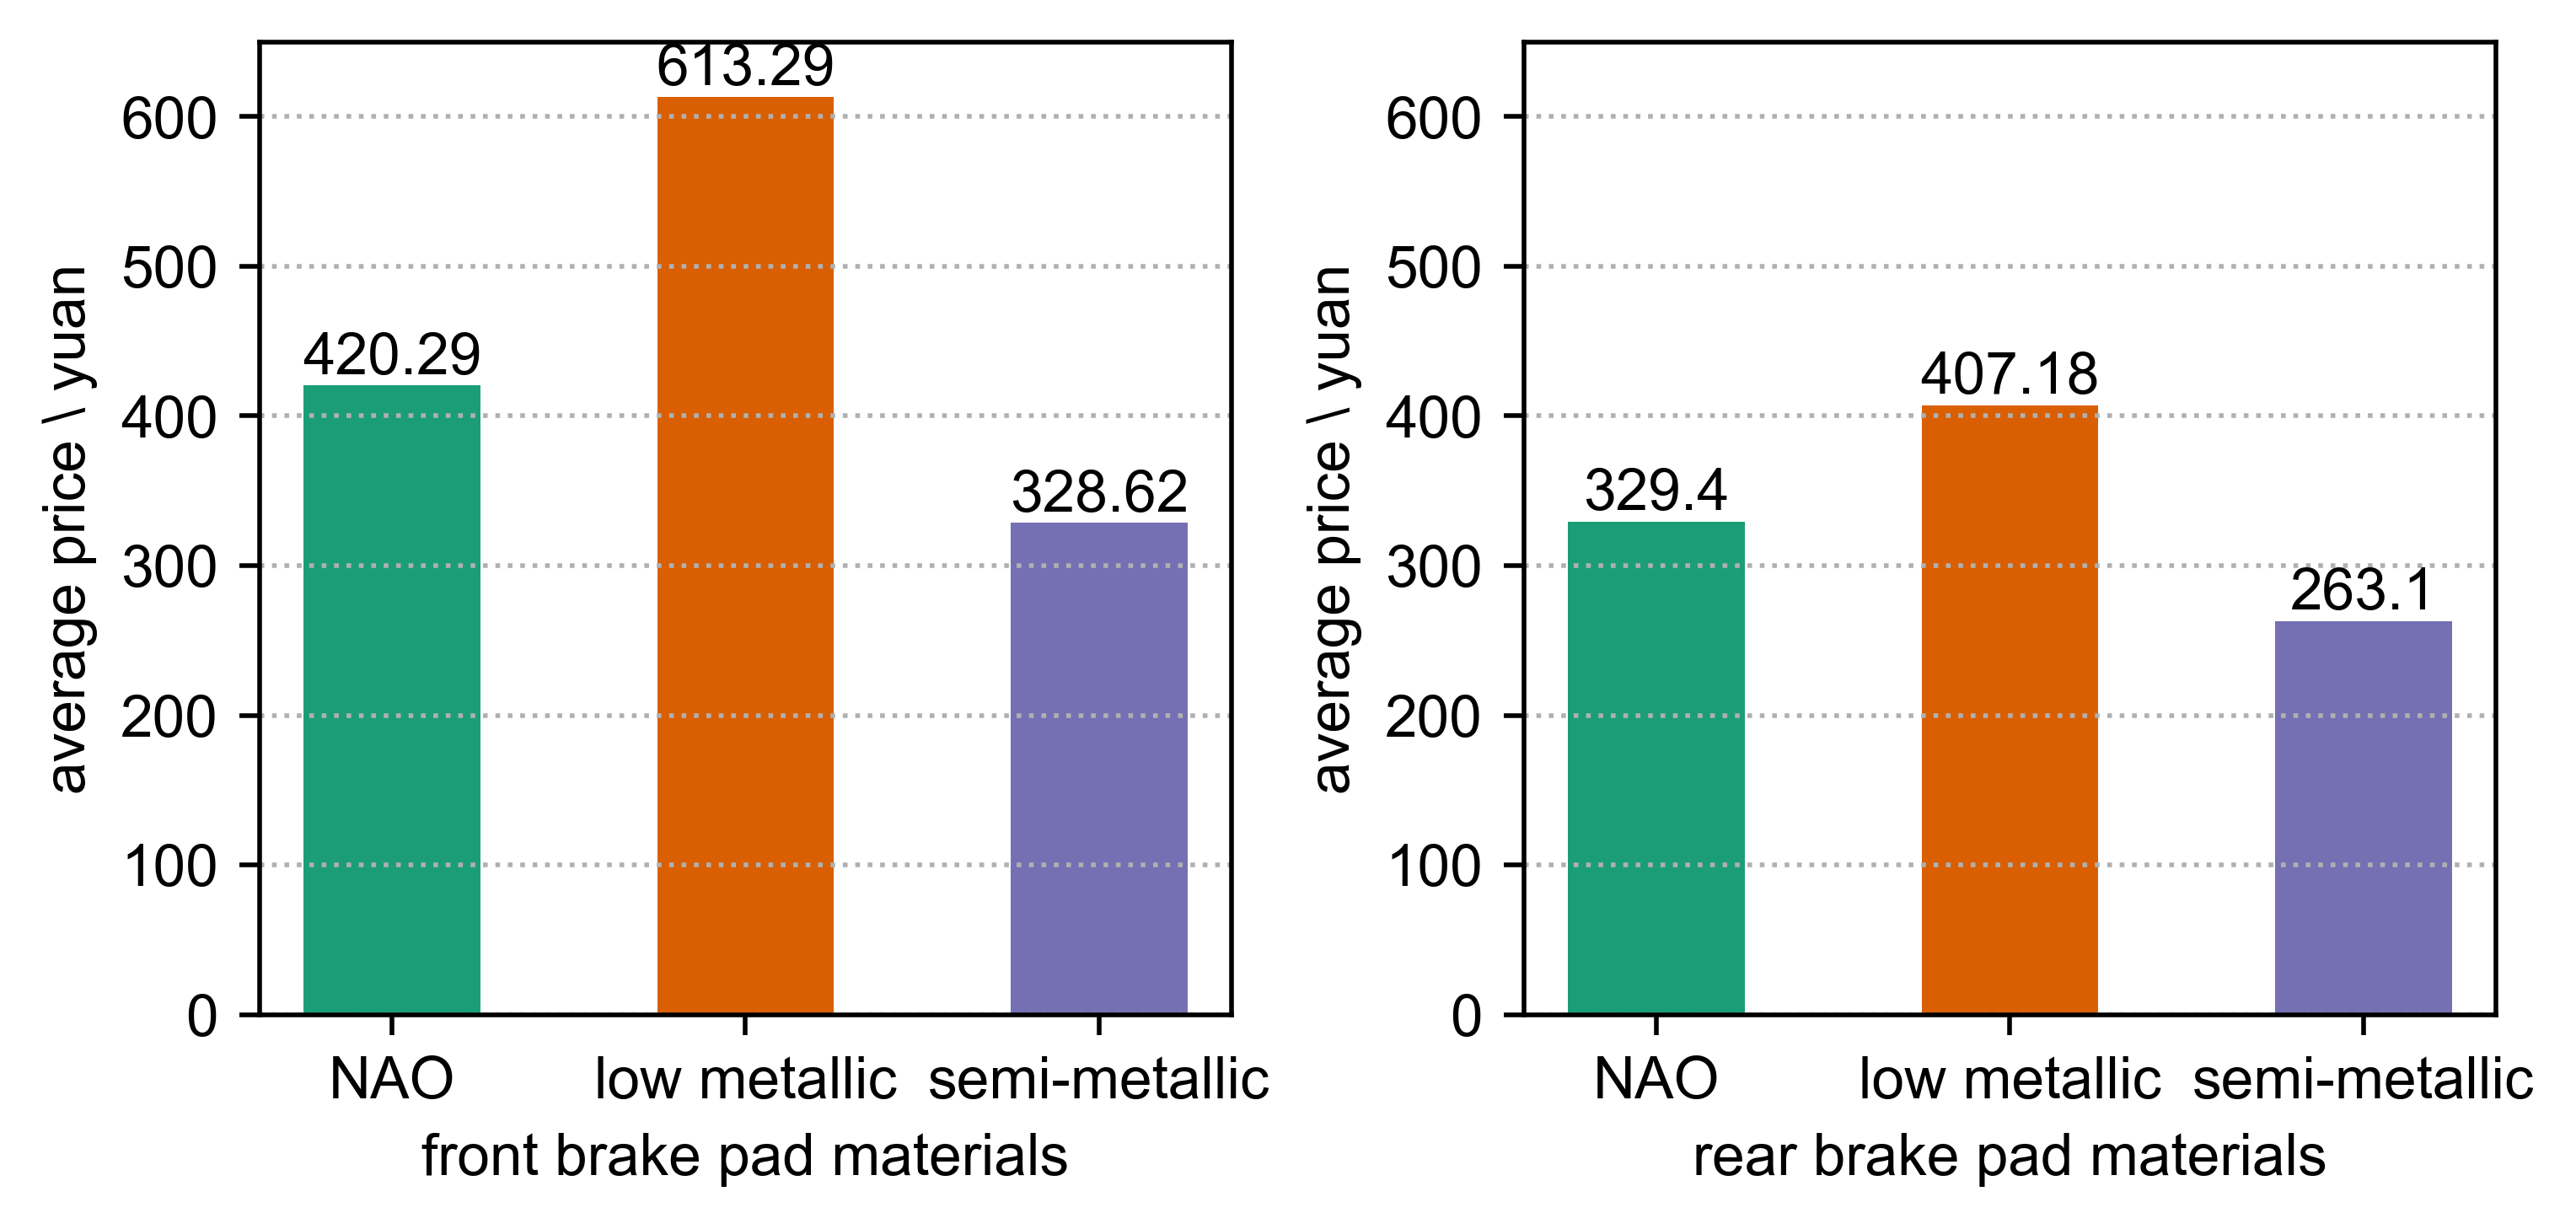

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(6,2.8), constrained_layout=True)

front = price.loc['front', 'price']
rear = price.loc['rear', 'price']

# 绘制前刹车片材料的柱状图
bars_front = ax[0].bar(
    x=front.index,
    height=front.values,
    width=0.5,
    color=plt.get_cmap('Dark2')(range(front.shape[0]))
)
ax[0].set_xlabel('front brake pad materials')
ax[0].set_ylim(0, 650)
ax[0].set_ylabel('average price \ yuan')
ax[0].grid(axis='y', linestyle=":")

# 在前刹车片材料的柱状图上方添加数值
for bar in bars_front:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# 绘制后刹车片材料的柱状图
bars_rear = ax[1].bar(
    x=rear.index,
    height=rear.values,
    width=0.5,
    color=plt.get_cmap('Dark2')(range(rear.shape[0]))
)
ax[1].set_xlabel('rear brake pad materials')
ax[1].set_ylim(0, 650)
ax[1].set_ylabel('average price \ yuan')
ax[1].grid(axis='y', linestyle=":")

# 在后刹车片材料的柱状图上方添加数值
for bar in bars_rear:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


### 2.3 good comments

In [11]:
from requests_html import HTMLSession

headers = {
    'Cookie': 'pinId=iuXMAaF7pVkB-ZaUy57Ew7V9-x-f3wj7; shshshfpa=3f810591-326a-a787-d906-3e3f78baaea0-1657332207; shshshfpx=3f810591-326a-a787-d906-3e3f78baaea0-1657332207; pin=jd_4a800764b8169; unick=%E5%B8%85%E6%B0%94%E7%9A%84%E5%B0%8F%E4%B9%8C%E9%BE%9F11; _tp=A10MK3vojkhCxe%2F%2FR6NZNahNbdoQZNVWIJpZqHFSRcE%3D; _pst=jd_4a800764b8169; __jdu=1718851363242970084230; TrackID=1vZnuwwtov_A15EyBX1Ptq6KsgHLQjsvXkP2K9VjXkknB1MSE_W3BfYuDEAsHK_M0K1M7XM1C5pKaDS6OWo_PNVCjmtdENTj5B0RmOB1yfPw; areaId=19; user-key=2abe7148-6931-4ee6-b2e0-0693affceb9c; ipLoc-djd=19-1611-19920-19972; PCSYCityID=CN_440000_440500_0; unpl=JF8EALJnNSttD0lTVRkDHUUSHAhUWw8NSEQLPGYNUQleHFZXSFUbERN7XlVdWBRKEB9sZRRUWlNOVQ4eCisSEXteU11bD00VB2xXXAQDGhUQR09SWEBJJVpRWFUJTR8KZmUFZG1bS2QFGjIbFBBCVFBeXw9JFAZsbwNVXFFOVwcaMhoiF3ttZF5aCUsTB19mNVVtGh8IAhMAGxETBl1SXlQBTxcBaGUGUV5QTVUEEgcYEBF7XGRd; __jdv=70901841|haosou-search|t_262767352_haosousearch|cpc|64790798831_0_f36a307f3fd14c42b9b094e7f3cbf122|1719132049483; shshshfpb=BApXcZMtJR_VAd6uBwC1JM2vPV0jDfB96BxVyJSgW9xJ1Mv6sboC2; 3AB9D23F7A4B3CSS=jdd03QR5ZHLZ7W3P4RYMUU37F5KT74EJG72GAFTLN3KJJDRHRAU46NUODBSYTO7J2T6V4HWGTFLHTBLRDAELSMEOS2JSECUAAAAMQIRAV4YYAAAAAC3EIS5J2KXMHZYX; __jda=95931165.1718851363242970084230.1718851363.1719043094.1719132049.13; __jdb=95931165.4.1718851363242970084230|13.1719132049; __jdc=95931165; 3AB9D23F7A4B3C9B=QR5ZHLZ7W3P4RYMUU37F5KT74EJG72GAFTLN3KJJDRHRAU46NUODBSYTO7J2T6V4HWGTFLHTBLRDAELSMEOS2JSECU; wlfstk_smdl=rowpzkqets5wiio2oqt2llfc99xqj9jb; jwotest_product=99'
}

def get_response(url, headers):
    """
    Obtain html response.
    """
    session = HTMLSession()
    r = session.get(url, headers=headers)
    r.raise_for_status()
    r.encoding = r.apparent_encoding
    session.close()
    return r

def get_good_comment(id, headers):
    """
    Product id.
    """
    # get comment url
    comment_url = 'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv100&productId=%d&score=0&sortType=5&page=0&pageSize=10' % id
    comment = get_response(comment_url, headers=headers)
    comment_n = comment.text.split("\"goodCountStr\":\"")[1].split("\"")[0]
    comment_n = comment_n.strip("+")
    # 10 thousand
    if "万" in comment_n:
        comment_n = comment_n.split("万")[0]
        comment_n += '0000'
    return float(comment_n)

In [12]:
df['good comments'] = df['id'].apply(lambda x: get_good_comment(x, headers))
df['good comments'] = df['good comments'].apply(lambda x: x if x % 1 == 0 else x * 10000)

[D:urllib3.connectionpool] Starting new HTTPS connection (%d): %s:%s
[D:urllib3.connectionpool] %s://%s:%s "%s %s %s" %s %s
[D:urllib3.connectionpool] Starting new HTTPS connection (%d): %s:%s
[D:urllib3.connectionpool] %s://%s:%s "%s %s %s" %s %s
[D:urllib3.connectionpool] Starting new HTTPS connection (%d): %s:%s
[D:urllib3.connectionpool] %s://%s:%s "%s %s %s" %s %s
[D:urllib3.connectionpool] Starting new HTTPS connection (%d): %s:%s
[D:urllib3.connectionpool] %s://%s:%s "%s %s %s" %s %s
[D:urllib3.connectionpool] Starting new HTTPS connection (%d): %s:%s
[D:urllib3.connectionpool] %s://%s:%s "%s %s %s" %s %s
[D:urllib3.connectionpool] Starting new HTTPS connection (%d): %s:%s
[D:urllib3.connectionpool] %s://%s:%s "%s %s %s" %s %s
[D:urllib3.connectionpool] Starting new HTTPS connection (%d): %s:%s
[D:urllib3.connectionpool] %s://%s:%s "%s %s %s" %s %s
[D:urllib3.connectionpool] Starting new HTTPS connection (%d): %s:%s
[D:urllib3.connectionpool] %s://%s:%s "%s %s %s" %s %s
[D:urlli

In [13]:
df.to_excel("./comments/jd_comments.xlsx", index=False)

In [14]:
comments_sum = df[['good comments', 'brake type']].groupby(by=['brake type']).sum()
comments_sum

,good comments
brake type,
front,6679661.0
rear,2788903.0


In [15]:
agg = df[['good comments', 'brake type', 'material']].groupby(by=['brake type', 'material']).sum()
agg['prop'] = None
agg.loc['front', 'prop'] = list(agg.loc['front','good comments'] / comments_sum.loc['front']['good comments'])
agg.loc['rear', 'prop'] = list(agg.loc['rear','good comments'] / comments_sum.loc['rear']['good comments'])
agg

good comments      prop
brake type material                             
front      NAO                799206.0  0.119648
           ceramic           4414937.0  0.660952
           low metallic      1313098.0  0.196582
           semimetalic        152420.0  0.022819
rear       NAO                529468.0  0.189848
           ceramic           1753543.0  0.628757
           low metallic       492344.0  0.176537
           semimetalic         13548.0  0.004858

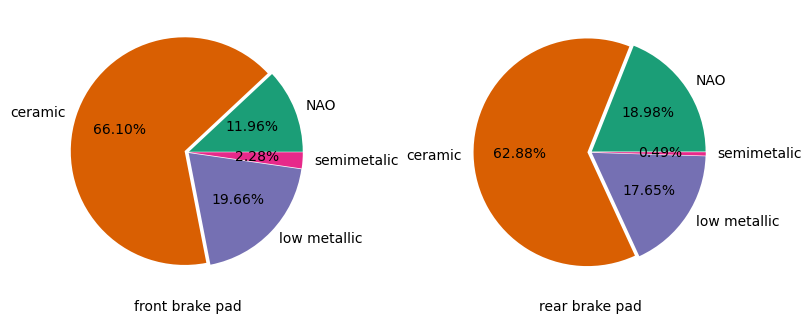

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(8,4), constrained_layout=True)

front = agg.loc['front', 'prop']
rear = agg.loc['rear', 'prop']

ax[0].pie(
    front.values,
    explode = [0.01, 0.03, 0.01, 0.01],
    labels = front.index,
    autopct='%.2f%%',
    colors = plt.get_cmap('Dark2')(range(front.shape[0]))
)
ax[0].set_xlabel('front brake pad')

ax[1].pie(
    rear.values,
    explode = [0.01, 0.03, 0.01, 0.01],
    labels = front.index,
    autopct='%.2f%%',
    colors = plt.get_cmap('Dark2')(range(rear.shape[0]))
)
ax[1].set_xlabel('rear brake pad')

plt.show()